# LetsGrowMore: Data Science

## Task 2 : [Intermediate Level Task] Prediction Using Decision Tree Algorithm

# Name of Intern: Payal Rakhama Paymode

Importing all required libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



In [5]:
df = pd.read_csv('Iris (2).csv')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.shape

(150, 6)

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Removing the unnecessary column

In [11]:
df = df.drop('Id', axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
# Total value of all three Species
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

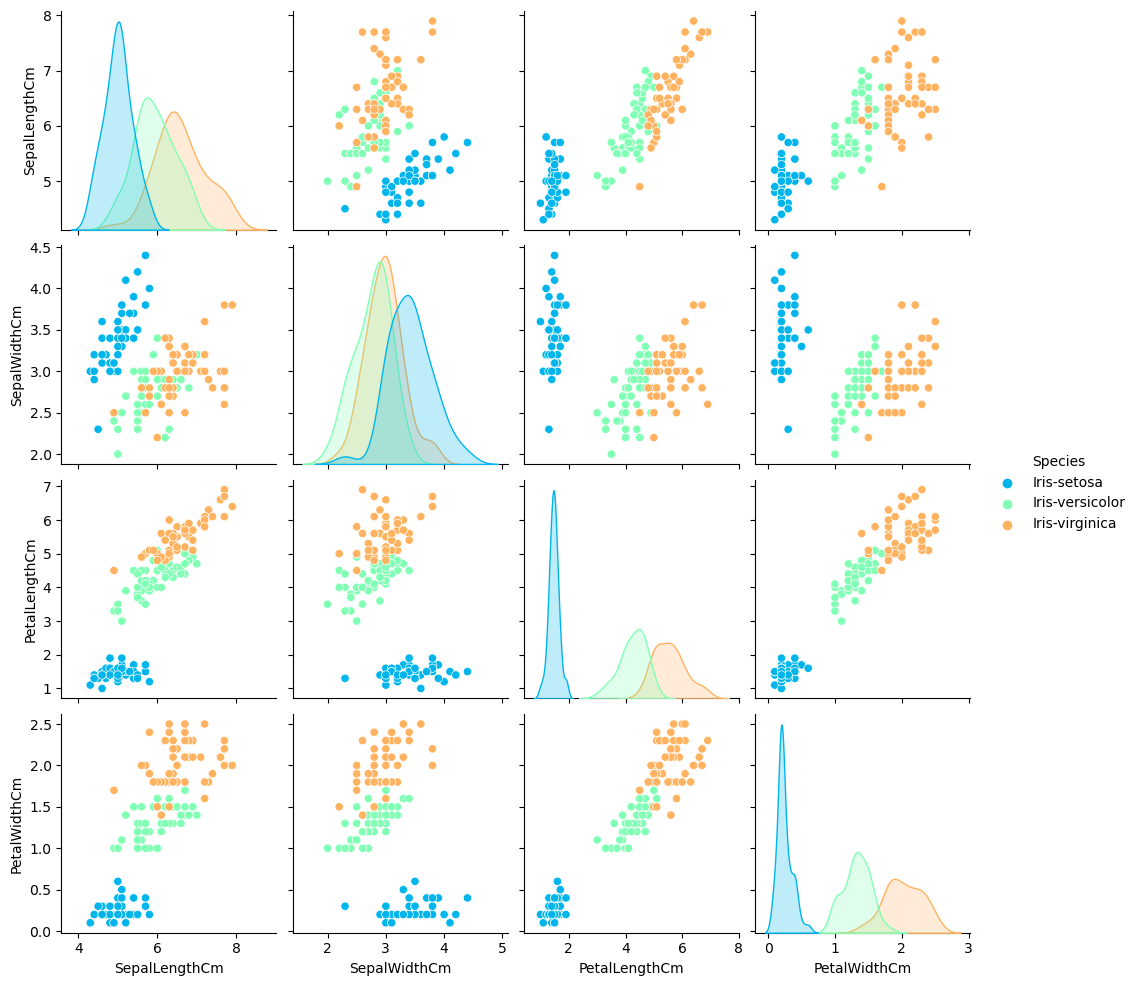

In [13]:
sns.pairplot(df, hue = 'Species', palette="rainbow")
plt.show()
     

<Axes: xlabel='Species', ylabel='count'>

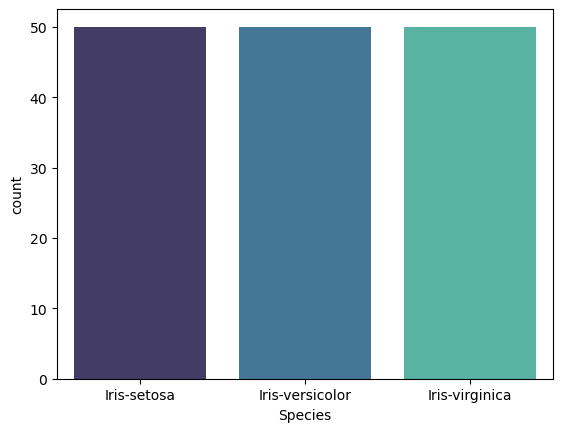

In [14]:
sns.countplot(x= df.Species, palette = "mako")

In [16]:
# Checking the correlation matrix of the categorical variables
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


[]

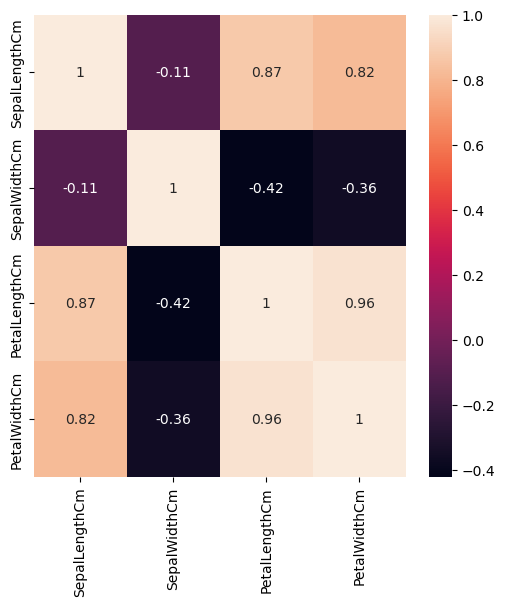

In [18]:
# Lets Check correlation using Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.plot()

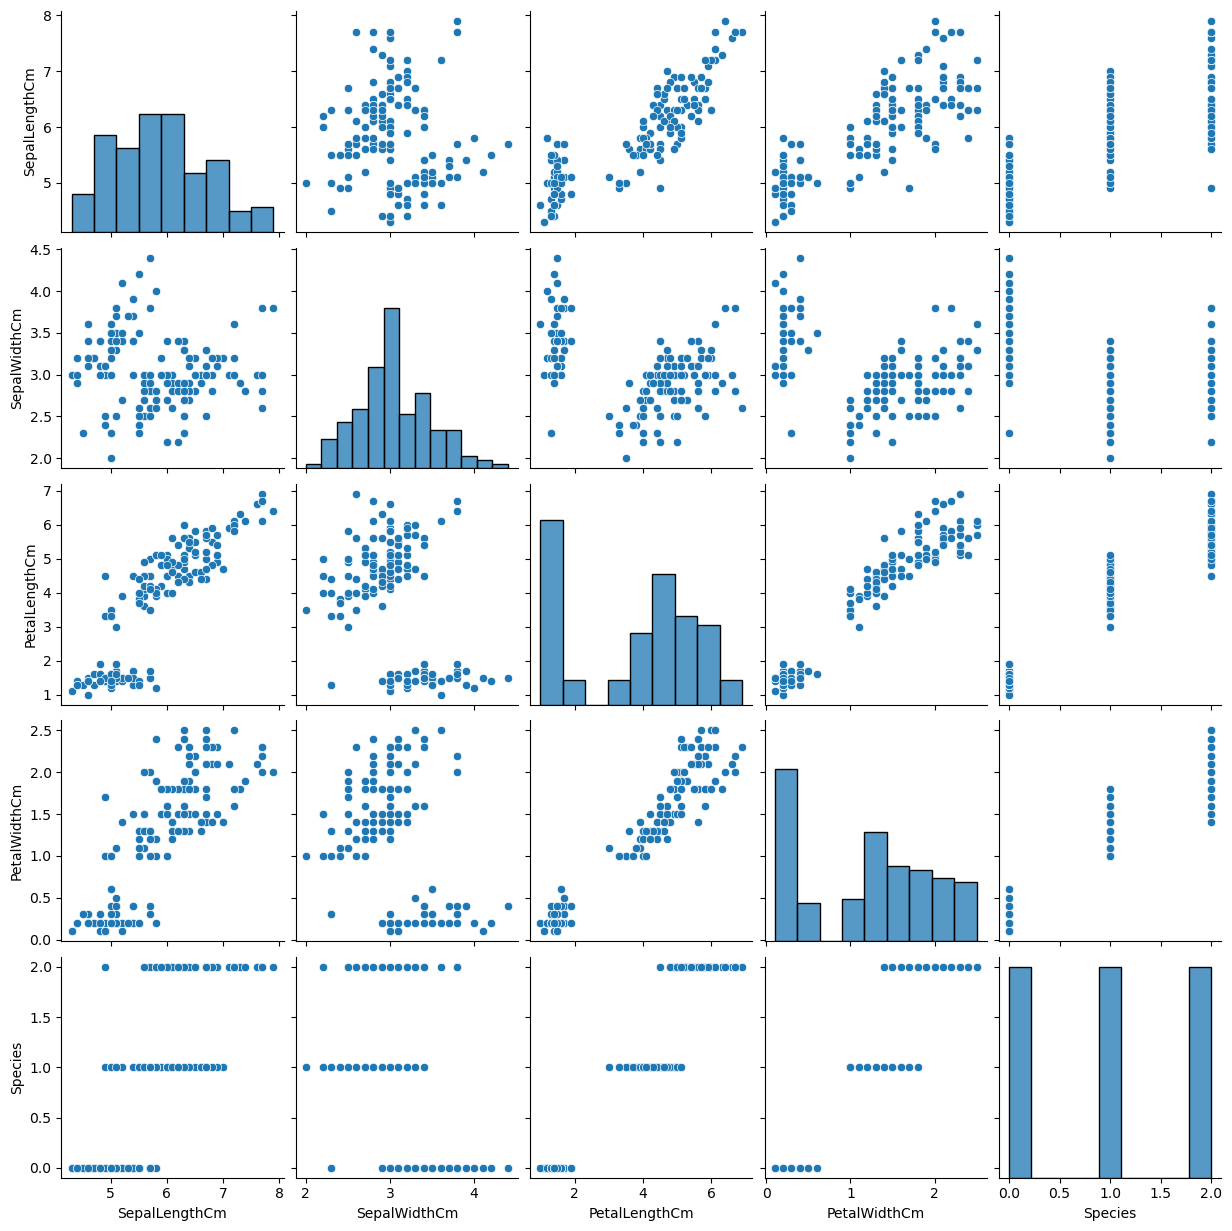

In [36]:
sns.pairplot(df)

# Decision Tree Tree Model Training

In [40]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [41]:
x= df.loc[:, features].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [42]:
# Model Training
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0)
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(x_train, y_train)
clf.predict(x_test[0:1])

array([2])

In [43]:
# Model Training
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0)
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(x_train, y_train)
clf.predict(x_test[0:1])

array([2])

# Calculating the Model accuracy

In [44]:
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



In [46]:
cm= metrics.confusion_matrix(y_test, clf.predict(x_test))

In [47]:
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

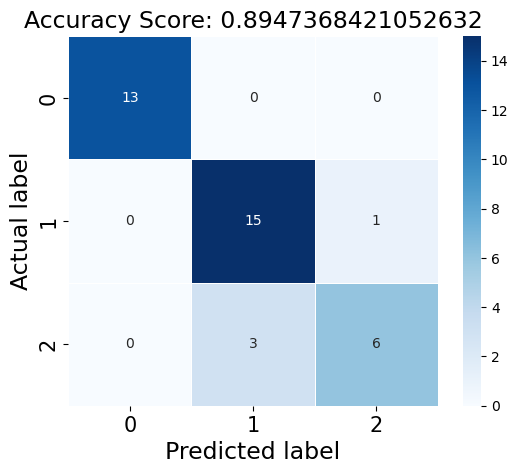

In [48]:
sns.heatmap(cm, annot=True,
           fmt='.0f',
           linewidths=.5,
           square= True,
           cmap = 'Blues');
plt.ylabel('Actual label',fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score),size =17);
plt.tick_params(labelsize= 15)

In [49]:
accuracy = []

In [50]:
Max_depth_range= list(range(1, 6))
print(Max_depth_range)

[1, 2, 3, 4, 5]


In [51]:
for depth in Max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth,
                                 random_state = 0)
    clf.fit(x_train, y_train)
    
    score = clf.score(x_test, y_test)
    accuracy.append(score)

# Visualizing the Trained Model

In [52]:
fn= ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn= ['setosa','versicolor','virginica']

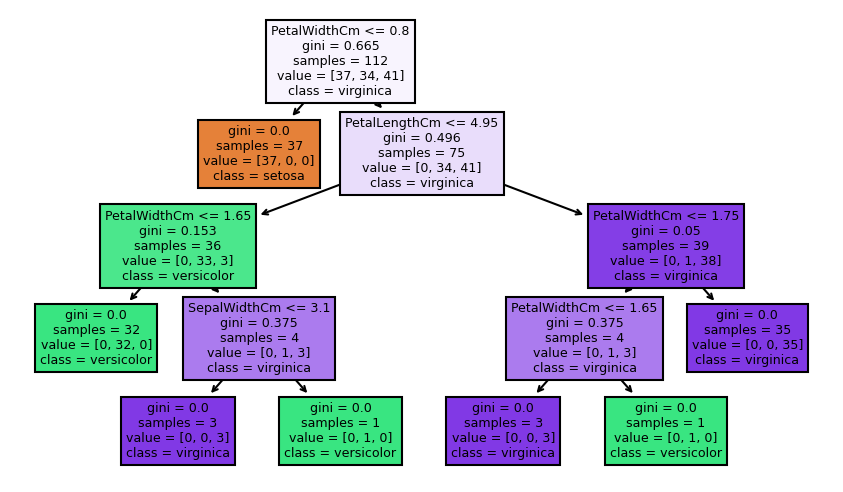

In [54]:
fig, axes = plt.subplots(nrows =1, ncols= 1, figsize= (7,4), dpi = 150)
tree.plot_tree(clf,
               feature_names = fn,
               class_names= cn,
               filled = True);